In [1]:
import pandas as pd
import sys
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib as joblib
import tensorflow as tf
from tensorflow import keras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import model_from_json,Model, load_model
from tensorflow.keras.layers import Dense, Input, Activation, BatchNormalization,Add,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, Callback, TensorBoard

import datetime
from sklearn.model_selection import train_test_split
import os

import copy

In [2]:
os.getcwd()

'e:\\Codes\\Mantis-Shrimp-Eye-s-Collision-Avoidance\\dnn'

In [3]:
os.chdir("../")
os.getcwd()

'e:\\Codes\\Mantis-Shrimp-Eye-s-Collision-Avoidance'

In [4]:
sys.path.append(os.getcwd()+"/tools")

In [5]:
from configmanager import ConfigurationManager
configurationManager = ConfigurationManager()

## Preprocess

In [19]:
dnn_rnn_dataset =  configurationManager.config_readable['dnn_rnn_dataset']
models_path_folder = configurationManager.config_readable['models_path_folder']

path_dnn_train = dnn_rnn_dataset+"fake_dnn_train.csv"
path_dnn_train = dnn_rnn_dataset+"dnn_train.csv"


df_ana = pd.read_csv(path_dnn_train,usecols=["object_type","width","height", "range_distance"])

df_train = copy.copy(df_ana[df_ana["range_distance"]>11])
df[df.val > 0.5]
df_train

,object_type,width,height,range_distance
0,Helicopter,16.000000,16.0,698.099154
1,Helicopter,16.000000,16.0,692.553591
2,Helicopter,16.000000,16.0,687.144329
3,Helicopter,16.000000,16.0,681.758264
4,Helicopter,16.000000,16.0,676.482461
...,...,...,...,...
86047,Airplane,128.000000,37.6,222.868320
86048,Airplane,134.400000,42.8,215.959436
86049,Airplane,144.200000,45.4,208.955719
86050,Airplane,137.600000,46.4,202.286877


In [20]:
df_train = df_train.sort_values('range_distance', ascending=True)
df_train

,object_type,width,height,range_distance
12737,Helicopter,143.200000,127.600000,26.440635
85545,Helicopter,26.000000,37.493372,26.686021
19451,Helicopter,123.800000,111.600000,28.485066
85544,Helicopter,337.166571,185.014409,29.873538
59842,Helicopter,65.646616,34.230769,29.919218
...,...,...,...,...
54503,Airplane,32.724304,13.083838,699.943752
74778,Helicopter,16.000000,16.000000,699.948963
61184,Helicopter,16.000000,16.000000,699.953968
67151,Helicopter,16.000000,16.000000,699.960940


In [ ]:
'''
@dataclass
class ObjectTypes(Enum):
    Airplane = 0
    Helicopter = 1
    Bird = 2
    Drone = 3
    Flock = 4
    Airborne = 5
'''

In [21]:
df_train['object_type'].replace('Airplane', 0, inplace=True)
df_train['object_type'].replace('Helicopter', 1, inplace=True)
df_train['object_type'].replace('Bird', 2, inplace=True)
df_train['object_type'].replace('Drone', 3, inplace=True)
df_train['object_type'].replace('Flock', 4, inplace=True)
df_train['object_type'].replace('Airborne', 5, inplace=True)


In [22]:
df_train.head(10)

,object_type,width,height,range_distance
12737,1,143.200000,127.600000,26.440635
85545,1,26.000000,37.493372,26.686021
19451,1,123.800000,111.600000,28.485066
85544,1,337.166571,185.014409,29.873538
59842,1,65.646616,34.230769,29.919218
12736,1,354.200000,256.000000,29.932464
59711,1,89.398281,70.456734,30.745673
55728,1,88.700565,59.875706,31.078418
51297,1,89.543478,78.275862,31.100222
52386,1,35.526316,22.368421,31.572412


In [23]:
df_train.tail(20)

,object_type,width,height,range_distance
56425,1,16.000000,16.000000,699.682960
60440,1,16.000000,16.000000,699.706057
15450,1,16.000000,16.000000,699.719229
64858,1,16.000000,16.000000,699.720929
62739,1,16.000000,16.000000,699.726700
78758,1,16.000000,16.000000,699.750331
66527,1,16.000000,16.000000,699.781889
2161,0,19.400000,6.400000,699.786453
62855,0,29.600269,7.368872,699.789544
14727,1,16.000000,16.000000,699.794274


In [8]:
'''df_train.width = df_train.width.astype(int)
df_train.height = df_train.height.astype(int)
df_train.range_distance = df_train.range_distance.astype(int)

df_train.head()'''

,object_type,width,height,range_distance
0,1,16,16,698
1,1,16,16,692
2,1,16,16,687
3,1,16,16,681
4,1,16,16,676


In [11]:
df_train.describe()

,object_type,width,height,range_distance
count,85251.000000,85251.000000,85251.000000,85251.000000
mean,0.845703,33.635859,24.376606,363.800567
std,0.361236,30.281140,18.702811,152.994637
min,0.000000,4.000000,3.200000,26.440635
25%,1.000000,16.000000,16.000000,254.307353
50%,1.000000,21.227539,18.000000,339.605495
75%,1.000000,40.538318,25.737224,472.272453
max,1.000000,375.142857,306.923077,699.963822


## Train

In [12]:
class DistanceTrain:

    def __init__(self,distance_folder_path,before_model=None,epoch=2000):

        self.path = distance_folder_path
        self.before_model = before_model
        self.epoch = epoch


    def distance_train(self, df_test):
        # ----------- import data and scaling ----------- #
        #df_train = pd.read_csv(path_dnn_train)
        #df_test = pd.read_csv(self.path + '/datasets/test.csv')

        #X_train = df_train[['xmin', 'ymin', 'xmax', 'ymax']].values
        X_train = df_test[['width', 'height', 'object_type']].values
        y_train = df_test[['range_distance']].values

        X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size = 0.1, random_state=123)

        #X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_train,y_train,train_size=.9, stratify=y_train)

        #X_test = df_test[['xmin', 'ymin', 'xmax', 'ymax']].values
        #y_test = df_test[['zloc']].values

        # standardized data
        x_scalar = StandardScaler()
        X_train = x_scalar.fit_transform(X_train)
        scaler_filename = self.path+"/dnn/xtrain_scaler.save"
        joblib.dump(x_scalar, scaler_filename)
        
        y_scalar = StandardScaler()
        y_train = y_scalar.fit_transform(y_train)
        scaler_filename = self.path+"/dnn/ytrain_scaler.save"
        joblib.dump(y_scalar, scaler_filename)
        
        # ----------- create model ----------- #
        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Dense(128, input_dim=3, kernel_initializer='normal', activation='relu'))
        model.add(tf.keras.layers.Dense(64, kernel_initializer='normal', activation='relu'))
        model.add(tf.keras.layers.Dense(32, kernel_initializer='normal', activation='relu'))
        model.add(tf.keras.layers.Dense(16, kernel_initializer='normal', activation='relu'))
        model.add(tf.keras.layers.Dense(1, kernel_initializer='normal'))

        #model = multi_gpu_model(model, gpus=2)

        initial_learning_rate = 0.1
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate,
            decay_steps=100000,
            decay_rate=0.96,
            staircase=True)
        
        opt= tf.keras.optimizers.SGD(learning_rate=lr_schedule)
        
        
        opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
        opt = 'adam' #ilk hali
        
        
        
        model.compile(loss='mean_squared_error', optimizer=opt)

        # ----------- define callbacks ----------- #
        earlyStopping = EarlyStopping(monitor='val_loss', patience=50, verbose=0, mode='min')
        reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')
        #modelname = "model@{}".format(int(time.time()))
        #tensorboard = TensorBoard(log_dir=path+"logs/{}".format(modelname))
        
        modelname ="model_{}".format(datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
        log_dir = self.path+"/logs/fit/" + modelname
        tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

        callbacks = [reduce_lr_loss,
                     earlyStopping,
                     tensorboard_callback]

        callbacks = [reduce_lr_loss,
                     earlyStopping]

        if self.before_model !=None:
            model.load_weights(self.path+"/dnn/{}.h5".format(self.before_model))

        # ----------- start training ----------- #
        '''history = model.fit(X_train, y_train,
                                    validation_split=0.1, epochs=self.epoch, batch_size=4096,
                                    verbose=1, callbacks=callbacks,)'''
        
        history = model.fit(X_train, y_train,validation_split=0.15, epochs=self.epoch, batch_size=4096,verbose=1)

        # ----------- save model and weights ----------- #
        '''model_json = model.to_json()
        with open(self.path+"/dnn/{}.json".format(modelname), "w") as json_file:
            json_file.write(model_json)'''

        '''model.save_weights(self.path+"/dnn/{}.h5".format(modelname))'''

        model.save(self.path+"/dnn/{}.h5".format(modelname))
        print("model name:   "+ modelname)
        print("Saved model to disk")

In [13]:
distance_folder_path = models_path_folder
before_model= None

epoch=200

distance_train = DistanceTrain(distance_folder_path=distance_folder_path, before_model=before_model, epoch=epoch)
distance_train.distance_train(df_test=copy.copy(df_train))

Epoch 1/200
16/16 [==============================] - 1s 15ms/step - loss: 0.9956 - val_loss: 0.9760
Epoch 2/200
16/16 [==============================] - 0s 7ms/step - loss: 0.9407 - val_loss: 0.8447
Epoch 3/200
16/16 [==============================] - 0s 7ms/step - loss: 0.7045 - val_loss: 0.5498
Epoch 4/200
16/16 [==============================] - 0s 7ms/step - loss: 0.4470 - val_loss: 0.3487
Epoch 5/200
16/16 [==============================] - 0s 7ms/step - loss: 0.3245 - val_loss: 0.3041
Epoch 6/200
16/16 [==============================] - 0s 7ms/step - loss: 0.2976 - val_loss: 0.2868
Epoch 7/200
16/16 [==============================] - 0s 7ms/step - loss: 0.2816 - val_loss: 0.2752
Epoch 8/200
16/16 [==============================] - 0s 7ms/step - loss: 0.2713 - val_loss: 0.2657
Epoch 9/200
16/16 [==============================] - 0s 7ms/step - loss: 0.2640 - val_loss: 0.2595
Epoch 10/200
16/16 [==============================] - 0s 8ms/step - loss: 0.2583 - val_loss: 0.2560
Epoch 11

## Prediction

In [25]:
class DistancePrediction:

    def __init__(self,distance_folder_path,model_path=None):

        self.path = distance_folder_path

        self.scalar_X = joblib.load(self.path+"/dnn/xtrain_scaler.save")
        self.scalar_y = joblib.load(self.path+"/dnn/ytrain_scaler.save")

        '''self.scalar_X_object_type = joblib.load(self.path+"/dnn/object_type_transform.save") 
        self.scalar_X_width = joblib.load(self.path+"/dnn/width_transform.save") 
        self.scalar_X_height = joblib.load(self.path+"/dnn/height_transform.save") 

        self.scalar_y = joblib.load(self.path+"/dnn/range_distance_transform.save")'''

        '''json_file = open(self.path+'/dnn/{}.json'.format(self.model), 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        self.loaded_model = model_from_json( loaded_model_json )'''

        # load weights into new model
        self.model =keras.models.load_model(self.path+"/dnn/{}.h5".format(model_path))
        
        #self.loaded_model.load_weights(self.path+"/dnn/{}.h5".format(self.model))
        print("Loaded model from disk")

        

    def distance_data_prediction(self,df_test):
        # get data
        #df_test = pd.read_csv(self.path+'/datasets/train.csv')

        #sc = MinMaxScaler(feature_range = (0, 1))

        X_test = df_test[['width', 'height', 'object_type']].values
        print("X_test[0]",X_test[0])
        y_test = df_test[['range_distance']].values
        y_test = y_test

        # standardized data
        scalar = joblib.load(self.path+"/dnn/xtrain_scaler.save")
        X_test = scalar.transform(X_test)
        print("scalar.transform(X_test) X_test[0]",X_test[0])
        
        scalar = joblib.load(self.path+"/dnn/ytrain_scaler.save")
        y_test = scalar.transform(y_test)

        '''for col in self.df_test.columns:
            if col == "object_type":
                self.df_test[col] = self.scalar_X_object_type.transform(self.df_test[col].values.reshape(-1,1))
            elif col == "width":
                self.df_test[col] = self.scalar_X_width.transform(self.df_test[col].values.reshape(-1,1))
            elif col == "height":
                self.df_test[col] = self.scalar_X_height.transform(self.df_test[col].values.reshape(-1,1))
            elif col == "range_distance":
                self.df_test[col] = self.scalar_y.transform(self.df_test[col].values.reshape(-1,1))'''

            

        '''X_test = self.df_test[['width', 'height', 'object_type']].values
        print("X_test[0]",X_test[0])
        #X_test = self.scalar_X.transform(X_test)

        
        y_test = self.df_test[['range_distance']].values'''

        # standardized data
        #scalar = joblib.load(self.path+"/dnn/xtrain_scaler.save")
        
        print("scalar.transform(X_test) X_test[0]",X_test[0])
        
        #scalar = joblib.load(self.path+"/dnn/ytrain_scaler.save")
        #y_test = self.scalar_y.transform(y_test)

        # load json and create model
        '''json_file = open(self.path+'/dnn/{}.json'.format(self.model), 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        loaded_model = model_from_json( loaded_model_json )'''

        # load weights into new model
        '''loaded_model.load_weights(self.path+"/dnn/{}.h5".format(self.model))
        print("Loaded model from disk")'''

        # evaluate loaded model on test data
        #loaded_model.compile(loss='mean_squared_error', optimizer='adam')
        y_pred = self.model.predict(X_test)
        print("loaded_model.predict")

        # scale up predictions to original values
        y_pred = self.scalar_y.inverse_transform(y_pred)
        print("y_pred[0]",y_pred[0])

        y_test = self.scalar_y.inverse_transform(y_test)
        print("y_test[0]",y_test[0])

        # save predictions
        df_result = df_test
        df_result['range_distance_pred'] = -100000
        df_result['score'] = -100000
        

        for idx, row in df_result.iterrows():
            #print("idx",idx)
            df_result.at[idx, 'range_distance_pred'] = int(y_pred[idx])
            df_result.at[idx, 'score'] = int(y_test[idx]-y_pred[idx])

        df_result.to_csv(dnn_rnn_dataset+'/dnn_predictions.csv', index=False)
        return df_result


    def distance_single_prediction(self,xmin, ymin, xmax, ymax, width,height,object_type):
        X_test = [[width, height, object_type]]
        #print("X_test",X_test)
        # standardized data
        #scalar = StandardScaler()
   
        X_test = self.scalar_X.transform(X_test)
        #print("scalar.transform(X_test)",X_test)

        # evaluate loaded model on test data
        #self.loaded_model.compile(loss='mean_squared_error', optimizer='adam')
        
        '''    temp = [[xmin]]
        print("temp",temp)
        temp = scalar.transform(temp)
        temp = scalar.transform(temp)
        print("scalar.transform(temp)",temp)
        temp = scalar.inverse_transform(temp)
        print("scalar.inverse_transform(temp)",temp)'''
        

        y_pred = self.model.predict(X_test)
        #print("loaded_model.predict(X_test)",y_pred)
        
        

        # scale up predictions to original values
        y_pred = self.scalar_y.inverse_transform(y_pred)
        #print("scalar.inverse_transform(y_pred)",y_pred)
        
        return y_pred[0][0]

In [26]:
distance_folder_path = models_path_folder
model_path = "model_20230323-190154"
distance_prediction = DistancePrediction(distance_folder_path=distance_folder_path, model_path=model_path)


Loaded model from disk


### Single Prediction

In [27]:
x1_y1= (200, 200) 	
x2_y2= ( 216,216)

object_type = 1

x1=x1_y1[0]
y1=x1_y1[1]
x2=x2_y2[0]
y2=x2_y2[1]

width=x2-x1
height=y2-y1

width = 0

height = 0

distance=distance_prediction.distance_single_prediction(xmin=x1,ymin=y1,xmax=x2,ymax=y2,width= width,height=height,object_type=object_type)  #model_20200407-162540
print("distance: ", distance)

1/1 [==============================] - 0s 80ms/step
distance:  580.2232


### Test csv Prediction

In [28]:
df_train

,object_type,width,height,range_distance
12737,1,143.200000,127.600000,26.440635
85545,1,26.000000,37.493372,26.686021
19451,1,123.800000,111.600000,28.485066
85544,1,337.166571,185.014409,29.873538
59842,1,65.646616,34.230769,29.919218
...,...,...,...,...
54503,0,32.724304,13.083838,699.943752
74778,1,16.000000,16.000000,699.948963
61184,1,16.000000,16.000000,699.953968
67151,1,16.000000,16.000000,699.960940


In [29]:

predictions = distance_prediction.distance_data_prediction(df_test=copy.copy(df_train))
print(predictions)

X_test[0] [143.2 127.6   1. ]
scalar.transform(X_test) X_test[0] [3.61875113 5.51663954 0.42670352]
scalar.transform(X_test) X_test[0] [3.61875113 5.51663954 0.42670352]
2665/2665 [==============================] - 2s 767us/step
loaded_model.predict
y_pred[0] [84.02141]
y_test[0] [26.44063539]


IndexError: index 85545 is out of bounds for axis 0 with size 85251

In [134]:
print(predictions['range_distance'].describe(include=['category']))

count    86052.000000
mean       360.415574
std        156.233769
min          0.003613
25%        251.571125
50%        337.691610
75%        470.688425
max        699.963822
Name: range_distance, dtype: float64


In [135]:
print(predictions['range_distance_pred'].describe(include=['category']))

count    86052.000000
mean       359.708374
std        131.291698
min        -35.000000
25%        263.000000
50%        342.000000
75%        500.000000
max        607.000000
Name: range_distance_pred, dtype: float64


In [136]:
path_dnn_pred = dnn_rnn_dataset+"dnn_predictions.csv"

dnn_predictions = pd.read_csv(path_dnn_pred)
dnn_predictions

,object_type,width,height,range_distance,range_distance_pred,score
0,1,16.000000,16.000000,0.003613,216,150
1,1,6.000000,6.000000,0.003770,336,30
2,1,16.000000,16.000000,0.006831,276,91
3,1,16.000000,16.000000,0.007469,512,-144
4,1,16.000000,16.000000,0.010007,422,-55
...,...,...,...,...,...,...
86047,0,32.724304,13.083838,699.943752,500,-107
86048,1,16.000000,16.000000,699.948963,500,68
86049,1,16.000000,16.000000,699.953968,500,-59
86050,1,16.000000,16.000000,699.960940,503,-9


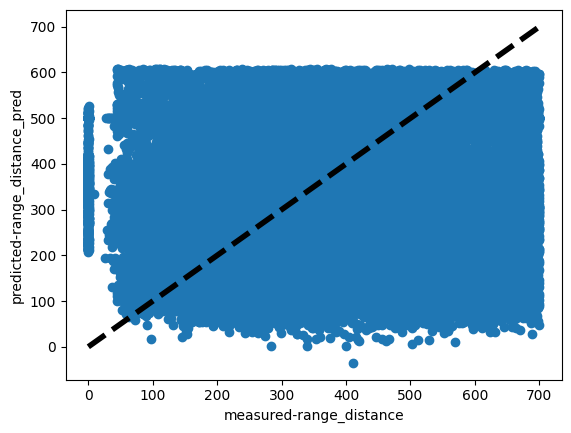

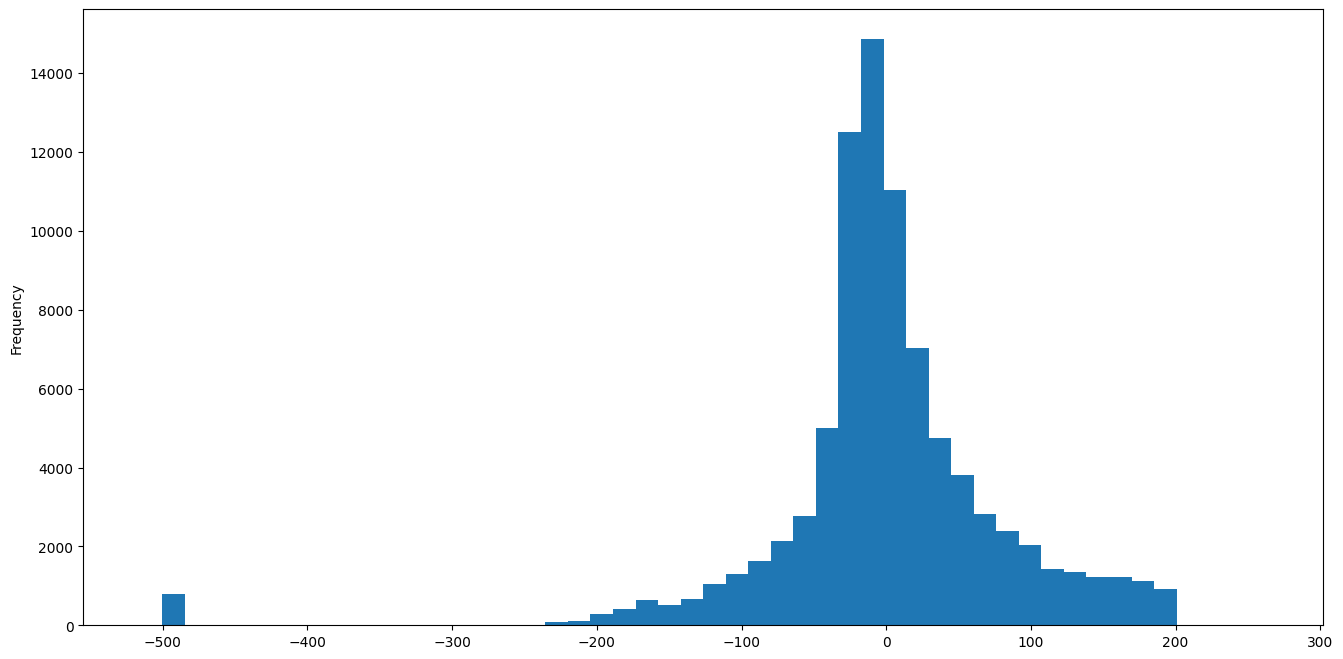

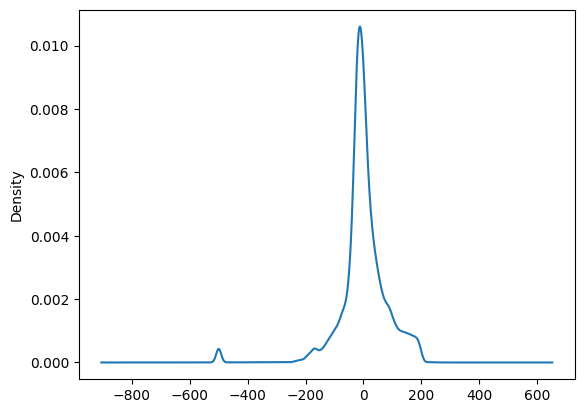

count    86052.000000
mean         0.265921
std         84.158389
min       -516.000000
25%        -27.000000
50%         -4.000000
75%         34.000000
max        263.000000
Name: score, dtype: float64


In [137]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

y_test = predictions['range_distance']
y_predicted = predictions['range_distance_pred']

ax.scatter(y_test, y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured-range_distance')
ax.set_ylabel('predicted-range_distance_pred')
plt.show()


predictions['score'].plot(kind="hist", bins=50,figsize=(16,8))
plt.show()


predictions['score'].plot(kind="kde")
plt.show()

print(predictions['score'].describe(include=['category']))